# Feature engineering for dataset heart sounds

- Convert the dataset the spectogram
- Extract latent features from it
- Link for dataset : https://physionet.org/pn3/challenge/2016/
- Reference : https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html

### Convert the dataset to spectogram
- Import modules
- Read the training files
- Convert wavs to spectogram

In [36]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import urllib
import matplotlib.pyplot as plt

fileName = 'a0204.wav';

### Default parameters for read wav file
- generate spectorgram
- plot it

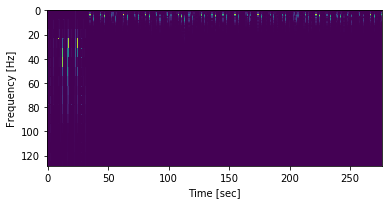

In [37]:
sample_rate, samples = wavfile.read(fileName)
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

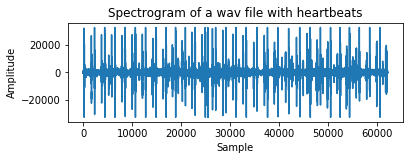

In [38]:
samplingFrequency, signalData = wavfile.read(fileName)

 

# Plot the signal read from wav file

plt.subplot(211)

plt.title('Spectrogram of a wav file with heartbeats')

 

plt.plot(signalData)

plt.xlabel('Sample')

plt.ylabel('Amplitude')

 

plt.show()



Text(0, 0.5, 'Frequency')

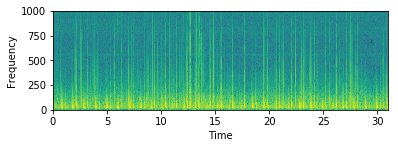

In [39]:
plt.subplot(212)

plt.specgram(signalData,Fs=samplingFrequency)

plt.xlabel('Time')

plt.ylabel('Frequency')

### Using scipy-signal processing with parameters
- Reference : https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html

In [44]:
frequency, data = wavfile.read(fileName)

print('Frequencey ' , frequency)


Frequencey  2000


In [50]:
print('data type of file ', type(data))
print('data shape of file is ', data.shape)
print('e.g of data is ', data)

data type of file  <class 'numpy.ndarray'>
data shape of file is  (62137,)
e.g of data is  [-335 -583 -382 ...  280  392  370]


In [58]:
sample_first_cycle = data[1:800]

In [81]:
sample_first_cycle

array([  -583,   -382,   -402,   -388,   -426,   -371,   -241,   -116,
           80,    333,    543,    783,   1002,   1177,   1299,   1409,
         1420,   1462,   1420,   1425,   1356,   1324,   1256,   1148,
         1005,    813,    613,    401,    187,      3,   -195,   -267,
         -385,   -400,   -392,   -315,   -221,   -108,     21,     30,
           49,     28,      1,      9,      9,    -20,    -54,   -130,
         -246,   -433,   -639,   -874,   -984,  -1120,  -1110,  -1051,
         -845,   -613,   -347,    -37,    130,    319,    427,    519,
          555,    597,    552,    462,    304,    188,     70,    -17,
          -73,   -189,   -268,   -403,   -560,   -643,   -785,   -858,
         -973,  -1032,  -1033,  -1046,   -889,   -771,   -612,   -386,
         -334,   -297,   -300,   -258,   -265,   -266,   -120,    -92,
          137,    201,    371,    408,    527,    475,    498,    436,
          356,    299,    130,      4,   -209,   -361,   -514,   -683,
      

Text(0.5, 0, 'Time [sec]')

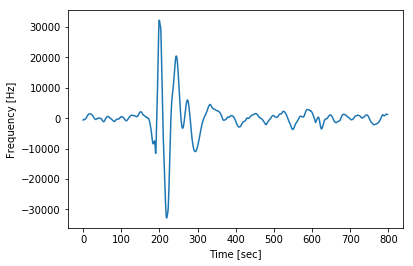

In [66]:
plt.plot(sample_first_cycle)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [69]:
frequencies_tmp, times_tmp, spectrogram_tmp = signal.spectrogram(sample_first_cycle, frequency, nperseg=256)

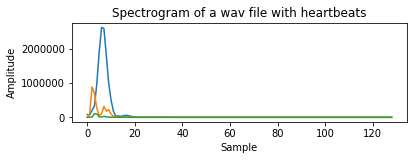

In [70]:
plt.subplot(211)

plt.title('Spectrogram of a wav file with heartbeats')

 

plt.plot(spectrogram_tmp)

plt.xlabel('Sample')

plt.ylabel('Amplitude')

 

plt.show()


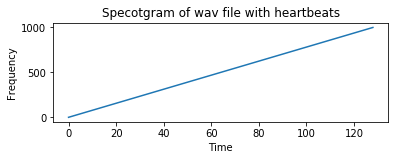

In [73]:
plt.subplot(212)
plt.title('Specotgram of wav file with heartbeats')
plt.plot(frequencies_tmp)
plt.xlabel('Time')

plt.ylabel('Frequency')

plt.show()

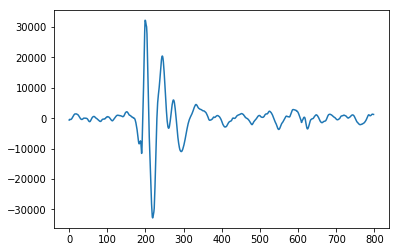

In [127]:
plt.plot(sample_first_cycle)

In [125]:
frequencies_tmp, times_tmp, spectrogram_tmp = signal.spectrogram(
    x        = sample_first_cycle,
    fs       = 10,
    noverlap = 16,
    nperseg  = 256,
    
)

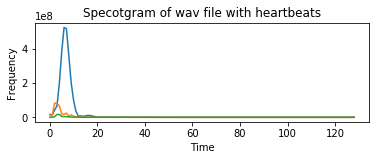

In [126]:
plt.subplot(212)
plt.title('Specotgram of wav file with heartbeats')
plt.plot(spectrogram_tmp)
plt.xlabel('Time')

plt.ylabel('Frequency')

plt.show()

In [168]:
frequencies_tmp_1, times_tmp_1, spectrogram_tmp_1 = signal.spectrogram(
 sample_first_cycle, 2000  ,nperseg = 256, noverlap=4,nfft=400,scaling='density'
    
)

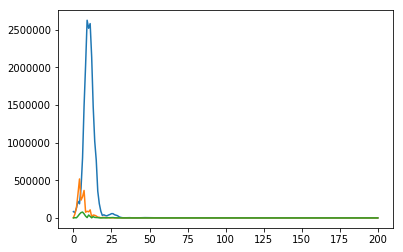

In [174]:
frequencies_x, times_x, spectrogram_x = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times_x, frequencies_x, spectrogram_x)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()